# Special Topics for Computer Science
## Homework 3 - Machine Learning 2
## Prapatsorn Boontam ID:5988010 Section 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

This has been preprocessed a bit in Excel:

remove extra stuff in column names

change number format into US format

Although I should've use Python to do it, I can't be bothered to.

In [2]:
country = pd.read_csv('../cs-hw3/countries.csv')
country.head()

,Country,Region,Population,Area,Pop_Density,Coast_area_ratio,Net_migration,Infant_mortality,GDP_per_capita,Literacy,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.38,0.24,0.38
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,232.00,188.00,579.00
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,101.00,0.60,298.00
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [3]:
country.isnull().sum()

Country              0
Region               0
Population           0
Area                 0
Pop_Density          0
Coast_area_ratio     0
Net_migration        3
Infant_mortality     3
GDP_per_capita       1
Literacy            18
Phones               4
Arable               2
Crops                2
Other                2
Climate             22
Birthrate            3
Deathrate            4
Agriculture         15
Industry            16
Service             15
dtype: int64

In [4]:
country.describe()

,Population,Area,Pop_Density,Coast_area_ratio,Net_migration,Infant_mortality,GDP_per_capita,Literacy,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,103.014858,213.869858,393.285377
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,129.336104,178.849522,288.185737
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.210000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.415000,0.395000,0.795000
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,54.000000,231.000000,475.500000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,163.500000,312.000000,619.750000
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,769.000000,906.000000,954.000000


In [5]:
country['Population'] = country['Population'] * 1.
country['Area'] = country['Area'] * 1.

## Data cleaning festival

In [6]:
country[country['Net_migration'].isnull()]

,Country,Region,Population,Area,Pop_Density,Coast_area_ratio,Net_migration,Infant_mortality,GDP_per_capita,Literacy,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
47,Cook Islands,OCEANIA,21388.0,240.0,89.1,50.00,NaN,NaN,5000.0,95.0,289.9,17.39,13.04,69.57,2.0,21.0,NaN,151.0,96.0,753.0
221,Wallis and Futuna,OCEANIA,16025.0,274.0,58.5,47.08,NaN,NaN,3700.0,50.0,118.6,5.00,25.00,70.00,2.0,NaN,NaN,NaN,NaN,NaN
223,Western Sahara,NORTHERN AFRICA,273008.0,266000.0,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.4


In [7]:
country.head()

,Country,Region,Population,Area,Pop_Density,Coast_area_ratio,Net_migration,Infant_mortality,GDP_per_capita,Literacy,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500.0,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.38,0.24,0.38
1,Albania,EASTERN EUROPE,3581655.0,28748.0,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,232.00,188.00,579.00
2,Algeria,NORTHERN AFRICA,32930091.0,2381740.0,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,101.00,0.60,298.00
3,American Samoa,OCEANIA,57794.0,199.0,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201.0,468.0,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [8]:
lb_make = LabelEncoder()
country['reg_code'] = lb_make.fit_transform(country['Region'])

In [9]:
country.head()

,Country,Region,Population,Area,Pop_Density,Coast_area_ratio,Net_migration,Infant_mortality,GDP_per_capita,Literacy,...,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,reg_code
0,Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500.0,48.0,0.00,23.06,163.07,700.0,36.0,...,12.13,0.22,87.65,1.0,46.60,20.34,0.38,0.24,0.38,0
1,Albania,EASTERN EUROPE,3581655.0,28748.0,124.6,1.26,-4.93,21.52,4500.0,86.5,...,21.09,4.42,74.49,3.0,15.11,5.22,232.00,188.00,579.00,3
2,Algeria,NORTHERN AFRICA,32930091.0,2381740.0,13.8,0.04,-0.39,31.00,6000.0,70.0,...,3.22,0.25,96.53,1.0,17.14,4.61,101.00,0.60,298.00,6
3,American Samoa,OCEANIA,57794.0,199.0,290.4,58.29,-20.71,9.27,8000.0,97.0,...,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN,8
4,Andorra,WESTERN EUROPE,71201.0,468.0,152.1,0.00,6.60,4.05,19000.0,100.0,...,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN,10


In [10]:
country[country['Net_migration'].isnull()]

,Country,Region,Population,Area,Pop_Density,Coast_area_ratio,Net_migration,Infant_mortality,GDP_per_capita,Literacy,...,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,reg_code
47,Cook Islands,OCEANIA,21388.0,240.0,89.1,50.00,NaN,NaN,5000.0,95.0,...,17.39,13.04,69.57,2.0,21.0,NaN,151.0,96.0,753.0,8
221,Wallis and Futuna,OCEANIA,16025.0,274.0,58.5,47.08,NaN,NaN,3700.0,50.0,...,5.00,25.00,70.00,2.0,NaN,NaN,NaN,NaN,NaN,8
223,Western Sahara,NORTHERN AFRICA,273008.0,266000.0,1.0,0.42,NaN,NaN,NaN,NaN,...,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.4,6


In [11]:
nm_mean_oc = country[(country.reg_code ==8)].Net_migration.mean()
nm_mean_oc

-2.060526315789473

In [12]:
country['Net_migration'].fillna(nm_mean_oc, inplace=True)

In [13]:
country[country['Infant_mortality'].isnull()]

,Country,Region,Population,Area,Pop_Density,Coast_area_ratio,Net_migration,Infant_mortality,GDP_per_capita,Literacy,...,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,reg_code
47,Cook Islands,OCEANIA,21388.0,240.0,89.1,50.00,-2.060526,NaN,5000.0,95.0,...,17.39,13.04,69.57,2.0,21.0,NaN,151.0,96.0,753.0,8
221,Wallis and Futuna,OCEANIA,16025.0,274.0,58.5,47.08,-2.060526,NaN,3700.0,50.0,...,5.00,25.00,70.00,2.0,NaN,NaN,NaN,NaN,NaN,8
223,Western Sahara,NORTHERN AFRICA,273008.0,266000.0,1.0,0.42,-2.060526,NaN,NaN,NaN,...,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.4,6


In [14]:
im_mean = country.Infant_mortality.mean()
im_mean

35.50696428571427

In [15]:
country['Infant_mortality'].fillna(im_mean, inplace=True)

In [16]:
country[country['GDP_per_capita'].isnull()]

,Country,Region,Population,Area,Pop_Density,Coast_area_ratio,Net_migration,Infant_mortality,GDP_per_capita,Literacy,...,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,reg_code
223,Western Sahara,NORTHERN AFRICA,273008.0,266000.0,1.0,0.42,-2.060526,35.506964,NaN,NaN,...,0.02,0.0,99.98,1.0,NaN,NaN,NaN,NaN,0.4,6


In [17]:
gdp_fillna = country[(country.reg_code==6)].GDP_per_capita.mean()
gdp_fillna

5460.0

In [18]:
country['GDP_per_capita'].fillna(gdp_fillna,inplace=True)

### Still quite a long way to go

In [19]:
country.isnull().sum()

Country              0
Region               0
Population           0
Area                 0
Pop_Density          0
Coast_area_ratio     0
Net_migration        0
Infant_mortality     0
GDP_per_capita       0
Literacy            18
Phones               4
Arable               2
Crops                2
Other                2
Climate             22
Birthrate            3
Deathrate            4
Agriculture         15
Industry            16
Service             15
reg_code             0
dtype: int64

In [20]:
country[country['Literacy'].isnull()]

,Country,Region,Population,Area,Pop_Density,Coast_area_ratio,Net_migration,Infant_mortality,GDP_per_capita,Literacy,...,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,reg_code
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976.0,51129.0,88.0,0.04,0.310000,21.050000,6100.0,NaN,...,13.60,2.96,83.44,4.0,8.77,8.27,142.00,308.00,0.55,3
66,Faroe Islands,WESTERN EUROPE,47246.0,1399.0,33.8,79.84,1.410000,6.240000,22000.0,NaN,...,2.14,0.00,97.86,NaN,14.05,8.70,0.27,0.11,0.62,10
74,Gaza Strip,NEAR EAST,1428757.0,360.0,3968.8,11.11,1.600000,22.930000,600.0,NaN,...,28.95,21.05,50.00,3.0,39.45,3.80,0.03,283.00,687.00,5
78,Gibraltar,WESTERN EUROPE,27928.0,7.0,3989.7,171.43,0.000000,5.130000,17500.0,NaN,...,0.00,0.00,100.00,NaN,10.74,9.31,NaN,NaN,NaN,10
80,Greenland,NORTHERN AMERICA,56361.0,2166086.0,0.0,2.04,-8.370000,15.820000,20000.0,NaN,...,0.00,0.00,100.00,1.0,15.93,7.84,NaN,NaN,NaN,7
85,Guernsey,WESTERN EUROPE,65409.0,78.0,838.6,64.10,3.840000,4.710000,20000.0,NaN,...,NaN,NaN,NaN,3.0,8.81,10.01,0.03,0.10,0.87,10
99,Isle of Man,WESTERN EUROPE,75441.0,572.0,131.9,27.97,5.360000,5.930000,21000.0,NaN,...,9.00,0.00,91.00,3.0,11.05,11.19,0.01,0.13,0.86,10
104,Jersey,WESTERN EUROPE,91084.0,116.0,785.2,60.34,2.760000,5.240000,24800.0,NaN,...,0.00,0.00,100.00,3.0,9.30,9.28,0.05,0.02,0.93,10
108,Kiribati,OCEANIA,105432.0,811.0,130.0,140.94,0.000000,48.520000,800.0,NaN,...,2.74,50.68,46.58,2.0,30.65,8.26,89.00,242.00,668.00,8
123,Macedonia,EASTERN EUROPE,2050554.0,25333.0,80.9,0.00,-1.450000,10.090000,6700.0,NaN,...,22.26,1.81,75.93,3.0,12.02,8.77,118.00,319.00,563.00,3


In [21]:
li_mean = country.Literacy.mean()
li_mean

82.83827751196172

In [22]:
country['Literacy'].fillna(li_mean,inplace=True)

In [23]:
country.isnull().sum()

Country              0
Region               0
Population           0
Area                 0
Pop_Density          0
Coast_area_ratio     0
Net_migration        0
Infant_mortality     0
GDP_per_capita       0
Literacy             0
Phones               4
Arable               2
Crops                2
Other                2
Climate             22
Birthrate            3
Deathrate            4
Agriculture         15
Industry            16
Service             15
reg_code             0
dtype: int64

In [24]:
country[country['Phones'].isnull()]

,Country,Region,Population,Area,Pop_Density,Coast_area_ratio,Net_migration,Infant_mortality,GDP_per_capita,Literacy,...,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,reg_code
52,Cyprus,NEAR EAST,784301.0,9250.0,84.8,7.01,0.430000,7.180000,19200.0,97.600000,...,7.79,4.44,87.77,3.0,12.56,7.68,37.0,198.0,765.0,5
58,East Timor,ASIA (EX. NEAR EAST),1062777.0,15007.0,70.8,4.70,0.000000,47.410000,500.0,58.600000,...,4.71,0.67,94.62,2.0,26.99,6.24,85.0,231.0,684.0,0
140,Montserrat,LATIN AMER. & CARIB,9439.0,102.0,92.5,39.22,0.000000,7.350000,3400.0,97.000000,...,20.00,0.00,80.00,2.0,17.59,7.10,NaN,NaN,NaN,4
223,Western Sahara,NORTHERN AFRICA,273008.0,266000.0,1.0,0.42,-2.060526,35.506964,5460.0,82.838278,...,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.4,6


In [25]:
ph_mean = country.Phones.mean()
country['Phones'].fillna(ph_mean,inplace=True)

In [26]:
cli_mean = country.Climate.mean()
cli_mean
country['Climate'].fillna(cli_mean,inplace=True)

In [27]:
agr_mean = country.Agriculture.mean()
country['Agriculture'].fillna(agr_mean,inplace=True)

In [28]:
ind_mean = country.Industry.mean()
country['Industry'].fillna(ind_mean,inplace=True)

In [29]:
ser_mean = country.Service.mean()
country['Service'].fillna(ser_mean,inplace=True)

## Almost done cleaning

In [30]:
country.isnull().sum()

Country             0
Region              0
Population          0
Area                0
Pop_Density         0
Coast_area_ratio    0
Net_migration       0
Infant_mortality    0
GDP_per_capita      0
Literacy            0
Phones              0
Arable              2
Crops               2
Other               2
Climate             0
Birthrate           3
Deathrate           4
Agriculture         0
Industry            0
Service             0
reg_code            0
dtype: int64

In [31]:
country[country['Arable'].isnull()]

,Country,Region,Population,Area,Pop_Density,Coast_area_ratio,Net_migration,Infant_mortality,GDP_per_capita,Literacy,...,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,reg_code
85,Guernsey,WESTERN EUROPE,65409.0,78.0,838.6,64.10,3.84,4.71,20000.0,82.838278,...,NaN,NaN,NaN,3.0,8.81,10.01,0.030000,0.100000,0.870000,10
134,Mayotte,SUB-SAHARAN AFRICA,201234.0,374.0,538.1,49.52,6.78,62.40,2600.0,82.838278,...,NaN,NaN,NaN,2.0,40.95,7.70,103.014858,213.869858,393.285377,9


In [32]:
ara_mean = country.Arable.mean()
country['Arable'].fillna(ara_mean,inplace=True)

In [33]:
crp_mean = country.Crops.mean()
country['Crops'].fillna(crp_mean,inplace=True)

In [34]:
otr_mean = country.Other.mean()
country['Other'].fillna(otr_mean,inplace=True)

In [35]:
bth_mean = country.Birthrate.mean()
country['Birthrate'].fillna(bth_mean,inplace=True)

In [36]:
dth_mean = country.Deathrate.mean()
country['Deathrate'].fillna(dth_mean,inplace=True)

### Finally done cleaning

In [37]:
country.isnull().sum()

Country             0
Region              0
Population          0
Area                0
Pop_Density         0
Coast_area_ratio    0
Net_migration       0
Infant_mortality    0
GDP_per_capita      0
Literacy            0
Phones              0
Arable              0
Crops               0
Other               0
Climate             0
Birthrate           0
Deathrate           0
Agriculture         0
Industry            0
Service             0
reg_code            0
dtype: int64

# Answer to Q1-1

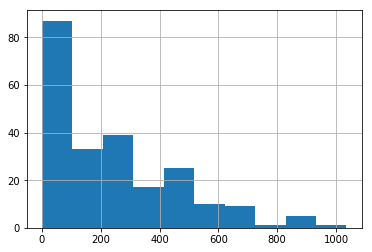

In [38]:
country.Phones.hist()
plt.show()

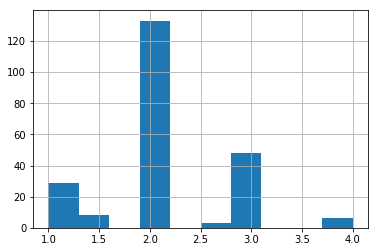

In [39]:
country.Climate.hist()
plt.show()

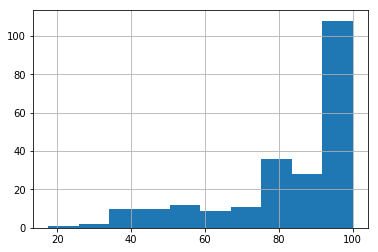

In [40]:
country.Literacy.hist()
plt.show()

I think the mean value did a decent job to fill in the values, it didn't make the distribution in attributes different that much, but only for some variables though. For some variables, it doesn't work because the values are discrete, such as climate, it seems from the .describe() that it's 1.0-4.0 but using means can result in 1.5 or whatever, which is not accurate.

In [41]:
df = country.copy()
df

,Country,Region,Population,Area,Pop_Density,Coast_area_ratio,Net_migration,Infant_mortality,GDP_per_capita,Literacy,...,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,reg_code
0,Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500.0,48.0,0.00,23.060000,163.070000,700.0,36.000000,...,12.13,0.22,87.65,1.000000,46.600000,20.340000,0.380000,0.240000,0.380000,0
1,Albania,EASTERN EUROPE,3581655.0,28748.0,124.6,1.26,-4.930000,21.520000,4500.0,86.500000,...,21.09,4.42,74.49,3.000000,15.110000,5.220000,232.000000,188.000000,579.000000,3
2,Algeria,NORTHERN AFRICA,32930091.0,2381740.0,13.8,0.04,-0.390000,31.000000,6000.0,70.000000,...,3.22,0.25,96.53,1.000000,17.140000,4.610000,101.000000,0.600000,298.000000,6
3,American Samoa,OCEANIA,57794.0,199.0,290.4,58.29,-20.710000,9.270000,8000.0,97.000000,...,10.00,15.00,75.00,2.000000,22.460000,3.270000,103.014858,213.869858,393.285377,8
4,Andorra,WESTERN EUROPE,71201.0,468.0,152.1,0.00,6.600000,4.050000,19000.0,100.000000,...,2.22,0.00,97.78,3.000000,8.710000,6.250000,103.014858,213.869858,393.285377,10
5,Angola,SUB-SAHARAN AFRICA,12127071.0,1246700.0,9.7,0.13,0.000000,191.190000,1900.0,42.000000,...,2.41,0.24,97.35,2.139024,45.110000,24.200000,96.000000,658.000000,246.000000,9
6,Anguilla,LATIN AMER. & CARIB,13477.0,102.0,132.1,59.80,10.760000,21.030000,8600.0,95.000000,...,0.00,0.00,100.00,2.000000,14.170000,5.340000,0.040000,0.180000,0.780000,4
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108.0,443.0,156.0,34.54,-6.150000,19.460000,11000.0,89.000000,...,18.18,4.55,77.27,2.000000,16.930000,5.370000,38.000000,0.220000,743.000000,4
8,Argentina,LATIN AMER. & CARIB,39921833.0,2766890.0,14.4,0.18,0.610000,15.180000,11200.0,97.100000,...,12.31,0.48,87.21,3.000000,16.730000,7.550000,95.000000,358.000000,547.000000,4
9,Armenia,C.W. OF IND. STATES,2976372.0,29800.0,99.9,0.00,-6.470000,23.280000,3500.0,98.600000,...,17.55,2.30,80.15,4.000000,12.070000,8.230000,239.000000,343.000000,418.000000,2


In [42]:
df = df.drop(columns=['Country','Region','reg_code'])
df

,Population,Area,Pop_Density,Coast_area_ratio,Net_migration,Infant_mortality,GDP_per_capita,Literacy,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,31056997.0,647500.0,48.0,0.00,23.060000,163.070000,700.0,36.000000,3.200000,12.13,0.22,87.65,1.000000,46.600000,20.340000,0.380000,0.240000,0.380000
1,3581655.0,28748.0,124.6,1.26,-4.930000,21.520000,4500.0,86.500000,71.200000,21.09,4.42,74.49,3.000000,15.110000,5.220000,232.000000,188.000000,579.000000
2,32930091.0,2381740.0,13.8,0.04,-0.390000,31.000000,6000.0,70.000000,78.100000,3.22,0.25,96.53,1.000000,17.140000,4.610000,101.000000,0.600000,298.000000
3,57794.0,199.0,290.4,58.29,-20.710000,9.270000,8000.0,97.000000,259.500000,10.00,15.00,75.00,2.000000,22.460000,3.270000,103.014858,213.869858,393.285377
4,71201.0,468.0,152.1,0.00,6.600000,4.050000,19000.0,100.000000,497.200000,2.22,0.00,97.78,3.000000,8.710000,6.250000,103.014858,213.869858,393.285377
5,12127071.0,1246700.0,9.7,0.13,0.000000,191.190000,1900.0,42.000000,7.800000,2.41,0.24,97.35,2.139024,45.110000,24.200000,96.000000,658.000000,246.000000
6,13477.0,102.0,132.1,59.80,10.760000,21.030000,8600.0,95.000000,460.000000,0.00,0.00,100.00,2.000000,14.170000,5.340000,0.040000,0.180000,0.780000
7,69108.0,443.0,156.0,34.54,-6.150000,19.460000,11000.0,89.000000,549.900000,18.18,4.55,77.27,2.000000,16.930000,5.370000,38.000000,0.220000,743.000000
8,39921833.0,2766890.0,14.4,0.18,0.610000,15.180000,11200.0,97.100000,220.400000,12.31,0.48,87.21,3.000000,16.730000,7.550000,95.000000,358.000000,547.000000
9,2976372.0,29800.0,99.9,0.00,-6.470000,23.280000,3500.0,98.600000,195.700000,17.55,2.30,80.15,4.000000,12.070000,8.230000,239.000000,343.000000,418.000000


# Q1 - 2 : Elbow method for k-means
(I got this from blog.cambridgespark.com)

In [43]:
mms = MinMaxScaler()
mms.fit(df)
data_transformed = mms.transform(df)

In [44]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

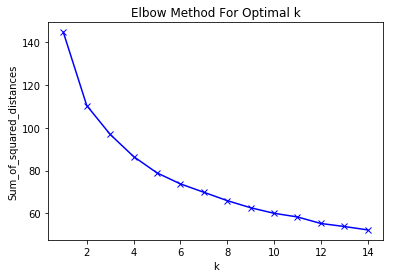

In [45]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

The optimal k is apparently 4

In [65]:
df.head()

,Population,Area,Pop_Density,Coast_area_ratio,Net_migration,Infant_mortality,GDP_per_capita,Literacy,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,31056997.0,647500.0,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380000,0.240000,0.380000
1,3581655.0,28748.0,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,232.000000,188.000000,579.000000
2,32930091.0,2381740.0,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,101.000000,0.600000,298.000000
3,57794.0,199.0,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,103.014858,213.869858,393.285377
4,71201.0,468.0,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,103.014858,213.869858,393.285377


In [48]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

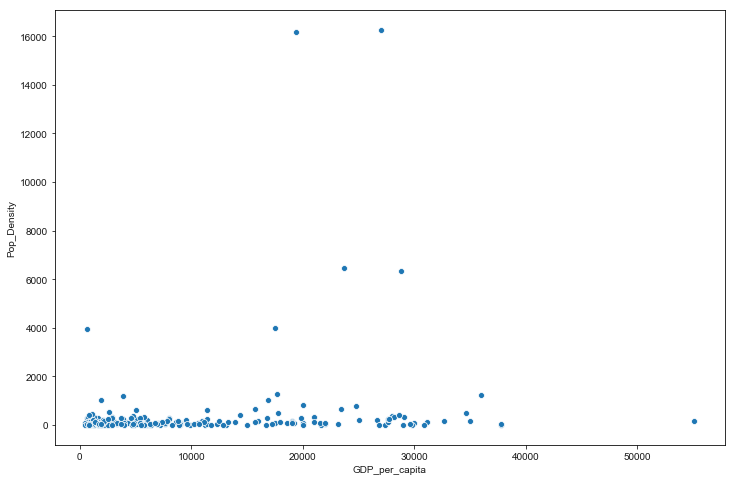

In [49]:
plt.subplots(figsize=(12, 8))
sb.set(font_scale=1.2)
ax = sb.scatterplot(x="GDP_per_capita", y="Pop_Density", data=df)
plt.show()

Draw a scatterplot just for reference

In [50]:
kmeans = KMeans(n_clusters=5)  
kmeans.fit(df) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [51]:
print(kmeans.cluster_centers_)

[[ 5.87641124e+06  2.49940513e+05  4.26787831e+02  2.51856614e+01
  -1.13024227e-01  3.47690523e+01  9.59978836e+03  8.30496772e+01
   2.38916115e+02  1.25985938e+01  4.98978013e+00  8.24111461e+01
   2.13948897e+00  2.24324561e+01  9.17251524e+00  9.70600152e+01
   2.04067184e+02  3.82542649e+02]
 [ 1.31397371e+09  9.59696000e+06  1.36900000e+02  1.50000000e-01
  -4.00000000e-01  2.41800000e+01  5.00000000e+03  9.09000000e+01
   2.66700000e+02  1.54000000e+01  1.25000000e+00  8.33500000e+01
   1.50000000e+00  1.32500000e+01  6.97000000e+00  1.25000000e+02
   4.73000000e+02  4.03000000e+02]
 [ 1.80920122e+08  4.92344600e+06  2.37387500e+02  1.48250000e+00
   1.47500000e-01  4.05250000e+01  1.13250000e+04  7.83375000e+01
   2.45687500e+02  2.22750000e+01  2.04000000e+00  7.56862500e+01
   2.07987805e+00  2.12912500e+01  9.74125000e+00  1.21626250e+02
   2.78425000e+02  5.48875000e+02]
 [ 5.55970051e+07  1.29595157e+06  1.07557143e+02  1.15071429e+00
   8.21785714e-01  3.87164286e+01  1.

In [52]:
print(kmeans.labels_)  

[3 0 3 0 0 0 0 0 3 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 3 0 0 0 3
 0 0 0 0 0 1 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 3 0 0 0 3 0 0 0 0
 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 2 3 0 0 0 0 3 0 2 0 0 0 3 0 0 3
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 3 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 2 0 0 0 0 0 3 3 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 3 3 0 3 0 0 0 0 0 0 0 3 3 0 0 0 0 3 0 0 0 0 3 0 3 2 0 0 0 0 3 0 0
 0 0 0 0 0]


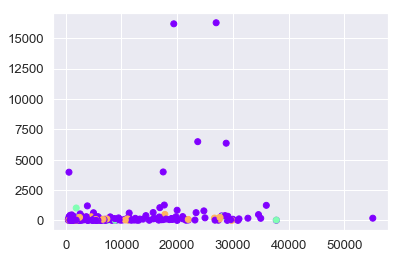

In [53]:
plt.scatter(df['GDP_per_capita'],df['Pop_Density'], c=kmeans.labels_, cmap='rainbow') 
plt.show()

I think this looks terrible and the k-means didn't create anything meaningful for this one. I'll try again because I just noticed the elbow method produce a different result from last time (it was 5 last time, this time it's 4 instead, I don't know either).

In [54]:
kmeans2 = KMeans(n_clusters=4)  
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [55]:
print(kmeans.cluster_centers_)

[[ 5.87641124e+06  2.49940513e+05  4.26787831e+02  2.51856614e+01
  -1.13024227e-01  3.47690523e+01  9.59978836e+03  8.30496772e+01
   2.38916115e+02  1.25985938e+01  4.98978013e+00  8.24111461e+01
   2.13948897e+00  2.24324561e+01  9.17251524e+00  9.70600152e+01
   2.04067184e+02  3.82542649e+02]
 [ 1.31397371e+09  9.59696000e+06  1.36900000e+02  1.50000000e-01
  -4.00000000e-01  2.41800000e+01  5.00000000e+03  9.09000000e+01
   2.66700000e+02  1.54000000e+01  1.25000000e+00  8.33500000e+01
   1.50000000e+00  1.32500000e+01  6.97000000e+00  1.25000000e+02
   4.73000000e+02  4.03000000e+02]
 [ 5.55970051e+07  1.29595157e+06  1.07557143e+02  1.15071429e+00
   8.21785714e-01  3.87164286e+01  1.00892857e+04  8.32428571e+01
   2.19757143e+02  1.79575000e+01  2.59642857e+00  7.94460714e+01
   2.16271777e+00  2.05257143e+01  9.68214286e+00  1.34143571e+02
   2.50120000e+02  4.15829286e+02]
 [ 1.80920122e+08  4.92344600e+06  2.37387500e+02  1.48250000e+00
   1.47500000e-01  4.05250000e+01  1.

In [56]:
print(kmeans.labels_) 

[2 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 2 0 0 0 2
 0 0 0 0 0 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 3 2 0 0 0 0 2 0 3 0 0 0 2 0 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 0 3 0 0 0 3 0 0 0 0 0 2 2 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 2 0 2 0 0 0 0 0 0 0 2 2 0 0 0 0 2 0 0 0 0 2 0 2 3 0 0 0 0 2 0 0
 0 0 0 0 0]


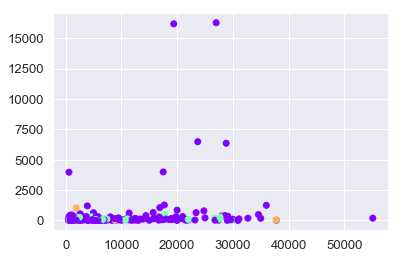

In [57]:
plt.scatter(df['GDP_per_capita'],df['Pop_Density'], c=kmeans.labels_, cmap='rainbow') 
plt.show()

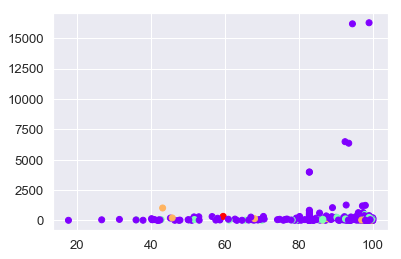

In [58]:
plt.scatter(df['Literacy'],df['Pop_Density'], c=kmeans.labels_, cmap='rainbow') 
plt.show()

The result is the same for the most part. Now I'm really lost.

Trying PCA next

In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

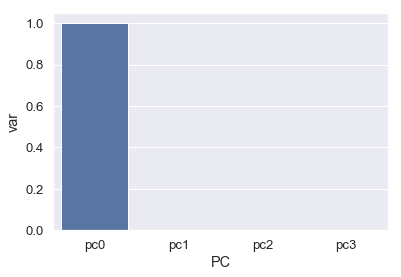

In [62]:
pc = pca.fit_transform(df)
pca_df = pd.DataFrame(data = pc, columns = ['pc0','pc1','pc2','pc3'])
tmp_df = pd.DataFrame({'var':pca.explained_variance_ratio_,'PC':['pc0','pc1','pc2','pc3']})
sb.barplot(x='PC',y='var',data=tmp_df)
plt.show()

What? There must be something really wrong here

Just found out from your comments that I should've scaled the variables first. So, I'm going to do that and run the k-means and PCA again.

In [66]:
kmeans = KMeans(n_clusters=4)  
kmeans.fit(data_transformed) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

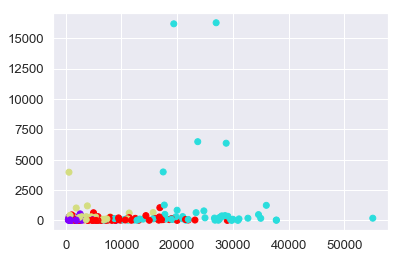

In [67]:
plt.scatter(df['GDP_per_capita'],df['Pop_Density'], c=kmeans.labels_, cmap='rainbow') 
plt.show()

I found out from code I copied from the website I quoted earlier has been scaled(?, I'm not really sure) and I just used that to do the k-means instead and it produced much better results in my opinion, I'm not sure if this is what it's supposed to be.... I'm just going to try and run PCA again just to see

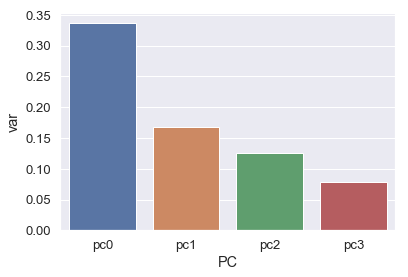

In [68]:
pc = pca.fit_transform(data_transformed)
pca_df = pd.DataFrame(data = pc, columns = ['pc0','pc1','pc2','pc3'])
tmp_df = pd.DataFrame({'var':pca.explained_variance_ratio_,'PC':['pc0','pc1','pc2','pc3']})
sb.barplot(x='PC',y='var',data=tmp_df)
plt.show()

I have no idea what happened but it finally worked I guess? It's something more than just on pc0?

In [72]:
df['clusters']=kmeans.labels_

In [73]:
df.head()

,Population,Area,Pop_Density,Coast_area_ratio,Net_migration,Infant_mortality,GDP_per_capita,Literacy,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,clusters
0,31056997.0,647500.0,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380000,0.240000,0.380000,0
1,3581655.0,28748.0,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,232.000000,188.000000,579.000000,2
2,32930091.0,2381740.0,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,101.000000,0.600000,298.000000,3
3,57794.0,199.0,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,103.014858,213.869858,393.285377,2
4,71201.0,468.0,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,103.014858,213.869858,393.285377,1


In [78]:
dfpca = pd.concat([pca_df,df[['clusters']]],axis=1)

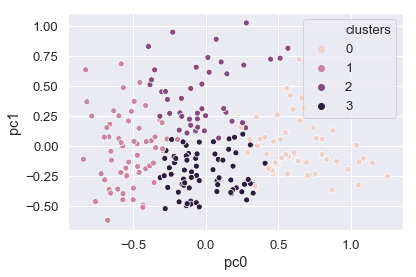

In [80]:
sb.scatterplot(x='pc0',y='pc1',hue='clusters',data=dfpca)
plt.show()

I dunno, that's a result?

I have no idea how to use t-SNE so I'm just going to follow tutorial from scikit-learn website...

In [81]:
from sklearn.manifold import TSNE
dftsne = TSNE(n_components=2).fit_transform(data_transformed)

In [82]:
dftsne = pd.DataFrame(data=dftsne,columns=['tsne0','tsne1'])
dfsthsth = pd.concat([dftsne,df[['clusters']]],axis=1)

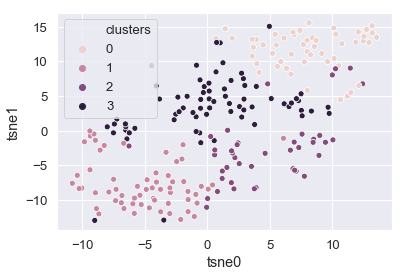

In [83]:
sb.scatterplot(x='tsne0',y='tsne1',hue='clusters',data=dfsthsth)
plt.show()

# Answer to Q1-2

I really have no idea so I'm going to guess clusters 0-1 are not-developed countries, cluster 2 is developing countries, and cluster 3 is developed countries?

# Q1-3
## Finally fill the n/a values with average from corrsponding clusters

In [84]:
country2 = pd.read_csv('../cs-hw3/countries.csv')
country2.head()

,Country,Region,Population,Area,Pop_Density,Coast_area_ratio,Net_migration,Infant_mortality,GDP_per_capita,Literacy,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.38,0.24,0.38
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,232.00,188.00,579.00
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,101.00,0.60,298.00
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [86]:
df['clusters']

0      0
1      2
2      3
3      2
4      1
5      0
6      3
7      1
8      1
9      1
10     1
11     3
12     1
13     3
14     3
15     3
16     2
17     2
18     1
19     1
20     3
21     0
22     1
23     0
24     3
25     1
26     0
27     3
28     3
29     3
      ..
197    2
198    1
199    0
200    0
201    2
202    2
203    2
204    3
205    2
206    2
207    3
208    3
209    3
210    0
211    2
212    3
213    1
214    1
215    1
216    3
217    0
218    3
219    2
220    3
221    2
222    2
223    3
224    0
225    0
226    0
Name: clusters, Length: 227, dtype: int32

In [87]:
country2['clusters']=df['clusters']
country2.head()

,Country,Region,Population,Area,Pop_Density,Coast_area_ratio,Net_migration,Infant_mortality,GDP_per_capita,Literacy,...,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,clusters
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,12.13,0.22,87.65,1.0,46.60,20.34,0.38,0.24,0.38,0
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,21.09,4.42,74.49,3.0,15.11,5.22,232.00,188.00,579.00,2
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,3.22,0.25,96.53,1.0,17.14,4.61,101.00,0.60,298.00,3
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN,2
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN,1


In [90]:
country2.isnull().sum()

Country              0
Region               0
Population           0
Area                 0
Pop_Density          0
Coast_area_ratio     0
Net_migration        3
Infant_mortality     3
GDP_per_capita       1
Literacy            18
Phones               4
Arable               2
Crops                2
Other                2
Climate             22
Birthrate            3
Deathrate            4
Agriculture         15
Industry            16
Service             15
clusters             0
dtype: int64

In [95]:
country2[country2['Net_migration'].isnull()]

,Country,Region,Population,Area,Pop_Density,Coast_area_ratio,Net_migration,Infant_mortality,GDP_per_capita,Literacy,...,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,clusters
47,Cook Islands,OCEANIA,21388,240,89.1,50.00,NaN,NaN,5000.0,95.0,...,17.39,13.04,69.57,2.0,21.0,NaN,151.0,96.0,753.0,2
221,Wallis and Futuna,OCEANIA,16025,274,58.5,47.08,NaN,NaN,3700.0,50.0,...,5.00,25.00,70.00,2.0,NaN,NaN,NaN,NaN,NaN,2
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,...,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.4,3


In [98]:
nm_mean_c2 = country2[(country2.clusters==2)].Net_migration.mean()
nm_mean_c2

-3.0048780487804874

In [104]:
c0=country2[country2.clusters==0].copy()
c0.head()

,Country,Region,Population,Area,Pop_Density,Coast_area_ratio,Net_migration,Infant_mortality,GDP_per_capita,Literacy,...,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,clusters
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,12.13,0.22,87.65,1.0,46.60,20.34,0.38,0.24,0.38,0
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,...,2.41,0.24,97.35,NaN,45.11,24.20,96.00,658.00,246.00,0
21,Benin,SUB-SAHARAN AFRICA,7862944,112620,69.8,0.11,0.00,85.00,1100.0,40.9,...,18.08,2.40,79.52,2.0,38.85,12.22,316.00,138.00,546.00,0
23,Bhutan,ASIA (EX. NEAR EAST),2279723,47000,48.5,0.00,0.00,100.44,1300.0,42.2,...,3.09,0.43,96.48,2.0,33.65,12.70,258.00,379.00,363.00,0
26,Botswana,SUB-SAHARAN AFRICA,1639833,600370,2.7,0.00,0.00,54.58,9000.0,79.8,...,0.65,0.01,99.34,1.0,23.08,29.50,24.00,469.00,507.00,0


In [105]:
c1=country2[country2.clusters==1].copy()
c2=country2[country2.clusters==2].copy()
c3=country2[country2.clusters==3].copy()

In [106]:
c2['Net_migration'].fillna(nm_mean_c2,inplace=True)
c2[c2['Net_migration'].isnull()]

,Country,Region,Population,Area,Pop_Density,Coast_area_ratio,Net_migration,Infant_mortality,GDP_per_capita,Literacy,...,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,clusters


In [107]:
nm_mean_c3 = c3.Net_migration.mean()
c3['Net_migration'].fillna(nm_mean_c3,inplace=True)
c3[c3['Net_migration'].isnull()]

,Country,Region,Population,Area,Pop_Density,Coast_area_ratio,Net_migration,Infant_mortality,GDP_per_capita,Literacy,...,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,clusters


In [108]:
country2.isnull().sum()

Country              0
Region               0
Population           0
Area                 0
Pop_Density          0
Coast_area_ratio     0
Net_migration        3
Infant_mortality     3
GDP_per_capita       1
Literacy            18
Phones               4
Arable               2
Crops                2
Other                2
Climate             22
Birthrate            3
Deathrate            4
Agriculture         15
Industry            16
Service             15
clusters             0
dtype: int64

I gave up on finding out which column in which clusters have n/a values, so I'm just going to do this instead

# Answer to Q1-3

In [110]:
c0.fillna(c0.mean(),inplace=True)
c0.head()

,Country,Region,Population,Area,Pop_Density,Coast_area_ratio,Net_migration,Infant_mortality,GDP_per_capita,Literacy,...,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,clusters
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,12.13,0.22,87.65,1.000000,46.60,20.34,0.38,0.24,0.38,0
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,...,2.41,0.24,97.35,1.806122,45.11,24.20,96.00,658.00,246.00,0
21,Benin,SUB-SAHARAN AFRICA,7862944,112620,69.8,0.11,0.00,85.00,1100.0,40.9,...,18.08,2.40,79.52,2.000000,38.85,12.22,316.00,138.00,546.00,0
23,Bhutan,ASIA (EX. NEAR EAST),2279723,47000,48.5,0.00,0.00,100.44,1300.0,42.2,...,3.09,0.43,96.48,2.000000,33.65,12.70,258.00,379.00,363.00,0
26,Botswana,SUB-SAHARAN AFRICA,1639833,600370,2.7,0.00,0.00,54.58,9000.0,79.8,...,0.65,0.01,99.34,1.000000,23.08,29.50,24.00,469.00,507.00,0


In [111]:
c1.fillna(c1.mean(),inplace=True)
c1.head()

,Country,Region,Population,Area,Pop_Density,Coast_area_ratio,Net_migration,Infant_mortality,GDP_per_capita,Literacy,...,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,clusters
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,2.22,0.00,97.78,3.0,8.71,6.25,34.243393,219.845636,568.922545,1
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,...,18.18,4.55,77.27,2.0,16.93,5.37,38.000000,0.220000,743.000000,1
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,...,12.31,0.48,87.21,3.0,16.73,7.55,95.000000,358.000000,547.000000,1
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,...,17.55,2.30,80.15,4.0,12.07,8.23,239.000000,343.000000,418.000000,1
10,Aruba,LATIN AMER. & CARIB,71891,193,372.5,35.49,0.00,5.89,28000.0,97.0,...,10.53,0.00,89.47,2.0,11.03,6.68,4.000000,333.000000,663.000000,1


In [112]:
c2.fillna(c2.mean(),inplace=True)
c2.head()

,Country,Region,Population,Area,Pop_Density,Coast_area_ratio,Net_migration,Infant_mortality,GDP_per_capita,Literacy,...,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,clusters
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,21.09,4.42,74.49,3.0,15.11,5.22,232.000000,188.00,579.000000,2
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,10.00,15.00,75.00,2.0,22.46,3.27,121.869512,190.71,360.357561,2
16,Bangladesh,ASIA (EX. NEAR EAST),147365352,144000,1023.4,0.40,-0.71,62.60,1900.0,43.1,...,62.11,3.07,34.82,2.0,29.80,8.27,199.000000,198.00,603.000000,2
17,Barbados,LATIN AMER. & CARIB,279912,431,649.5,22.51,-0.31,12.50,15700.0,97.4,...,37.21,2.33,60.46,2.0,12.71,8.67,0.060000,0.16,0.780000,2
44,Comoros,SUB-SAHARAN AFRICA,690948,2170,318.4,15.67,0.00,74.93,700.0,56.5,...,35.87,23.32,40.81,2.0,36.93,8.20,0.400000,0.04,0.560000,2


In [113]:
c3.fillna(c3.mean(),inplace=True)
c3.head()

,Country,Region,Population,Area,Pop_Density,Coast_area_ratio,Net_migration,Infant_mortality,GDP_per_capita,Literacy,...,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,clusters
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,3.22,0.25,96.53,1.0,17.14,4.61,101.00,0.60,298.00,3
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,...,0.00,0.00,100.00,2.0,14.17,5.34,0.04,0.18,0.78,3
11,Australia,OCEANIA,20264082,7686850,2.6,0.34,3.98,4.69,29000.0,100.0,...,6.55,0.04,93.41,1.0,12.14,7.51,38.00,262.00,0.70,3
13,Azerbaijan,C.W. OF IND. STATES,7961619,86600,91.9,0.00,-4.90,81.74,3400.0,97.0,...,19.63,2.71,77.66,1.0,20.74,9.75,141.00,457.00,402.00,3
14,Bahamas. The,LATIN AMER. & CARIB,303770,13940,21.8,25.41,-2.20,25.21,16700.0,95.6,...,0.80,0.40,98.80,2.0,17.57,9.05,0.03,0.07,0.90,3


In [114]:
countriesFinallyFilled = pd.concat([c0,c1,c2,c3])
countriesFinallyFilled = countriesFinallyFilled.sort_index()
countriesFinallyFilled.head()

,Country,Region,Population,Area,Pop_Density,Coast_area_ratio,Net_migration,Infant_mortality,GDP_per_capita,Literacy,...,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,clusters
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,12.13,0.22,87.65,1.0,46.60,20.34,0.380000,0.240000,0.380000,0
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,21.09,4.42,74.49,3.0,15.11,5.22,232.000000,188.000000,579.000000,2
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,3.22,0.25,96.53,1.0,17.14,4.61,101.000000,0.600000,298.000000,3
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,10.00,15.00,75.00,2.0,22.46,3.27,121.869512,190.710000,360.357561,2
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,2.22,0.00,97.78,3.0,8.71,6.25,34.243393,219.845636,568.922545,1


In [115]:
countriesFinallyFilled.isnull().sum()

Country             0
Region              0
Population          0
Area                0
Pop_Density         0
Coast_area_ratio    0
Net_migration       0
Infant_mortality    0
GDP_per_capita      0
Literacy            0
Phones              0
Arable              0
Crops               0
Other               0
Climate             0
Birthrate           0
Deathrate           0
Agriculture         0
Industry            0
Service             0
clusters            0
dtype: int64

Yay!

# GDP Prediction w/ Linear Regression + L2 regularization

In [116]:
from sklearn.linear_model import Ridge
#scikit-learn L2 regression

In [117]:
cc = pd.read_csv('../cs-hw3/countries.csv')

In [141]:
thai = countriesFinallyFilled.iloc[201]
thai = pd.DataFrame(thai)
thai = thai.T
thai

,Country,Region,Population,Area,Pop_Density,Coast_area_ratio,Net_migration,Infant_mortality,GDP_per_capita,Literacy,...,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,clusters
201,Thailand,ASIA (EX. NEAR EAST),64631595,514000,125.7,0.63,0,20.48,7400,92.6,...,29.36,6.46,64.18,2,13.87,7.04,99,441,0.46,2


I should've used the filled one instead...

Edit: I did afterwards because the model bombed when I tried to fit the model

In [119]:
train = countriesFinallyFilled[countriesFinallyFilled['Country'] != 'Thailand']
train = train.reset_index(drop=True)
train.head()

,Country,Region,Population,Area,Pop_Density,Coast_area_ratio,Net_migration,Infant_mortality,GDP_per_capita,Literacy,...,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,clusters
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,12.13,0.22,87.65,1.0,46.60,20.34,0.380000,0.240000,0.380000,0
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,21.09,4.42,74.49,3.0,15.11,5.22,232.000000,188.000000,579.000000,2
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,3.22,0.25,96.53,1.0,17.14,4.61,101.000000,0.600000,298.000000,3
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,10.00,15.00,75.00,2.0,22.46,3.27,121.869512,190.710000,360.357561,2
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,2.22,0.00,97.78,3.0,8.71,6.25,34.243393,219.845636,568.922545,1


In [120]:
from sklearn.model_selection import KFold
X = train.drop(['GDP_per_capita'], axis=1)
X = X.drop(['Country'], axis=1)
X = X.drop(['Region'], axis=1)
Y = train['GDP_per_capita']
kf = KFold(n_splits=5)
print(kf.get_n_splits(X))
print(kf)

5
KFold(n_splits=5, random_state=None, shuffle=False)


In [121]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

In [123]:
alpha_values = (0.01,0.1,1.0,10.0)
mae = np.zeros((5,4))
for degree in range(1,6):
  fold = 0
  for train_index, test_index in kf.split(X):
    for i in range (4):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
      pipeline = make_pipeline(PolynomialFeatures(degree),
                          Ridge(alpha=alpha_values[i],normalize=True))
      pipeline.fit(X_train,Y_train)
      prediction = pipeline.predict(X_test)
      error = metrics.mean_absolute_error(Y_test,prediction)
      mae[degree-1][i] += error
    fold=fold+1

In [124]:
mae/5

array([[ 3815.21126582,  3834.96751654,  4264.04660724,  6611.5483135 ],
       [ 4814.11593539,  3288.45691643,  3518.97823902,  4458.34782932],
       [ 5280.98179097,  4297.61511052,  3524.65507089,  3800.9467544 ],
       [ 8215.80634509,  5744.17883539,  4344.97222251,  3749.65763832],
       [11156.10617717,  9481.61051501,  7274.27964708,  4877.76067632]])

In [126]:
mae.min()/5

3288.456916429789

# Answer to Q2-2

Best alpha value is 0.1 and polynomial degree is 2?

In [128]:
pipe2 = make_pipeline(PolynomialFeatures(2),Ridge(alpha=0.1,normalize=True))
pipe2.fit(X,Y)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001))])

In [142]:
thai = thai.reset_index(drop=True)
thaiX = thai.drop(['GDP_per_capita'], axis=1)
thaiX = thaiX.drop(['Country'], axis=1)
thaiX = thaiX.drop(['Region'], axis=1)
thaiY = thai['GDP_per_capita']
th_gdp = pipe2.predict(thaiX)
th_mae = metrics.mean_absolute_error(thaiY,th_gdp)

# Answer to Q2-3

In [147]:
print('Real GDP = ',thaiY,'\n')
print('Predicted GDP = ',th_gdp,'\n')
print('Mean Absolute Error = ',th_mae,'\n')

Real GDP =  0    7400
Name: GDP_per_capita, dtype: object 

Predicted GDP =  [6545.71650569] 

Mean Absolute Error =  854.2834943064272 



It was way off, I'm not sure what happened. I'm going to continue anyway

In [144]:
whatif1 = thaiX.copy()
whatif1['Population'] = whatif1['Population']*1.5
th_gdp_whatif1 = pipe2.predict(whatif1)
print('150% population GDP = ',th_gdp_whatif1)

150% population GDP =  [6399.38159184]


In [146]:
whatif2 = thaiX.copy()
whatif2['Population'] = whatif2['Population']*0.5
th_gdp_whatif2 = pipe2.predict(whatif2)
print('50% population GDP = ',th_gdp_whatif2)

50% population GDP =  [6692.47857541]


# Answer to Q2-4

I guess we should start a massacre then.....

Even the results is not really accurate, but it at least showed a trend that if Thailand have less people, the country would have more GDP.